# Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import streamlit as st

# Read Dataset

In [2]:
df= pd.read_csv('cars_sales_cleaned.csv') #importing data from excel sheet
print("\n📌 Sample of the dataframe:")
print(f"✅ Dataset Shape: {df.shape}")
df.sample(5) #representing sample of my data



📌 Sample of the dataframe:
✅ Dataset Shape: (5235, 14)


,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
4556,New,10,56021,Illinois,2024,1,Jeep,Hybrid,Four-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
2735,Used,40769,27412,Illinois,2021,4,Mazda,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,First owner
3228,Used,24886,39999,Illinois,2020,5,Audi,Hybrid,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
4140,New,6,38972,Illinois,2024,1,Subaru,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
3709,New,3,26140,Illinois,2024,1,Nissan,Gasoline,Front-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner


# Data Understanding

In [3]:
#reperesenting data information
print("\n📌 General Information of the dataframe:")
print(df.info())


📌 General Information of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition            5235 non-null   object
 1   mileage_mi           5235 non-null   int64 
 2   price                5235 non-null   int64 
 3   state                5235 non-null   object
 4   model_year           5235 non-null   int64 
 5   car_age              5235 non-null   int64 
 6   manufacturer         5235 non-null   object
 7   fuel_type            5235 non-null   object
 8   drivetrain           5235 non-null   object
 9   transmission         5235 non-null   object
 10  exterior_color       5235 non-null   object
 11  interior_color       5235 non-null   object
 12  accidents_or_damage  5235 non-null   object
 13  1_owner_vehicle      5235 non-null   object
dtypes: int64(4), object(10)
memory usage: 572.7+ KB
None


In [4]:
# Step 3: Nulls & Duplicates Check
print("\n📌 Number of duplicated rows:")
print(df.duplicated().sum())

print("\n🔍 Null values ratio per column:")
print(df.isnull().mean()* 100)


📌 Number of duplicated rows:
0

🔍 Null values ratio per column:
condition              0.0
mileage_mi             0.0
price                  0.0
state                  0.0
model_year             0.0
car_age                0.0
manufacturer           0.0
fuel_type              0.0
drivetrain             0.0
transmission           0.0
exterior_color         0.0
interior_color         0.0
accidents_or_damage    0.0
1_owner_vehicle        0.0
dtype: float64


In [5]:
# Summary statistics for numerical columns
print("\n📊 Summary statistics for Numerical Columns:")
display(df.describe())


📊 Summary statistics for Numerical Columns:


,mileage_mi,price,model_year,car_age
count,5235.000000,5235.000000,5235.000000,5235.000000
mean,34364.521872,33136.098376,2019.906399,5.093601
std,39336.939894,15836.255085,5.413052,5.413052
min,0.000000,3777.000000,1982.000000,0.000000
25%,9.000000,21059.500000,2018.000000,1.000000
50%,20953.000000,30670.000000,2021.000000,4.000000
75%,61254.000000,43160.000000,2024.000000,7.000000
max,153077.000000,76198.000000,2025.000000,43.000000


In [6]:
# Summary statistics for Categorical columns
print("\n📊 Summary statistics for Categorical columns:")
display(df.describe(include= 'O'))


📊 Summary statistics for Categorical columns:


,condition,state,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
count,5235,5235,5235,5235,5235,5235,5235,5235,5235,5235
unique,3,2,46,4,4,6,8,9,2,2
top,Used,Illinois,Jeep,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
freq,2905,5021,542,4755,2273,4807,2030,3651,4135,3716


### Dataset is now cleaned and ready for analysis and visualization

# Questions to be addressed

1- What is the distribution of vehicle conditions, and how does condition influence vehicle pricing?

2- Which manufacturers dominate the market, and which command the highest vehicle prices?

3- What are the most frequent fuel types, and how do these influence pricing?

4- Which exterior colors are preferred, and how are they related to vehicle prices?

5- Which drivetrain types are most frequently seen, and how do they affect pricing?

6- Which transmissions are used most often, and how do they affect vehicle prices?

7- How are car model years distributed, and what is their relationship with pricing?


# Univariate Analysis

# Price

### What is the distribution of car prices?

In [7]:
print("🔽 The lowest Price:")
print(df['price'].sort_values().head())

print("🔼 The highest Price:")
print(df['price'].sort_values(ascending=False).head())

q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outliers = df[(df['price'] > upper) | (df['price'] < lower)]
print(f"🚨 Number of outliers in price: {outliers.shape[0]}")

🔽 The lowest Price:
40      3777
179     4550
3071    4799
1656    4900
2205    4980
Name: price, dtype: int64
🔼 The highest Price:
3213    76198
536     75991
552     75975
980     75900
2274    75819
Name: price, dtype: int64
🚨 Number of outliers in price: 0


Summary statistics for Price:
count     5235.000000
mean     33136.098376
std      15836.255085
min       3777.000000
25%      21059.500000
50%      30670.000000
75%      43160.000000
max      76198.000000
Name: price, dtype: float64


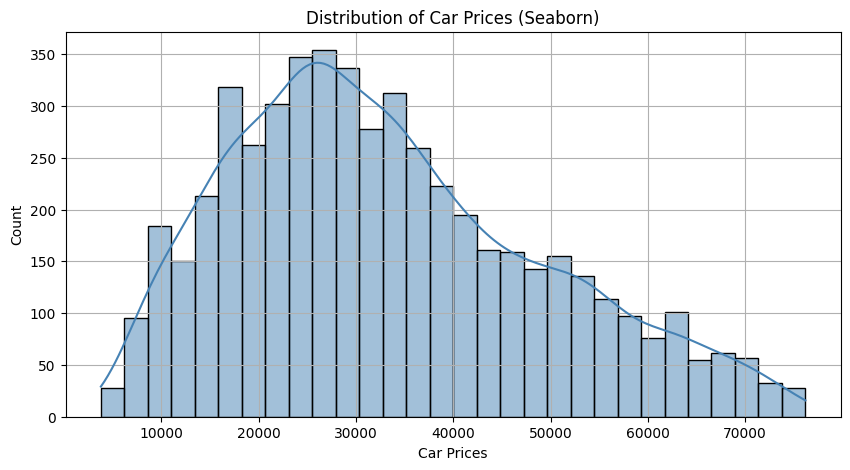

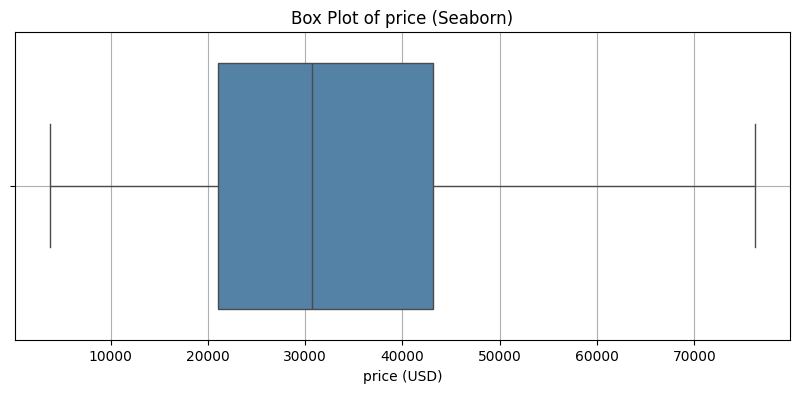

In [8]:
print("Summary statistics for Price:")
print(df['price'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Car Prices (Seaborn)')
plt.xlabel('Car Prices')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='steelblue')
plt.title('Box Plot of price (Seaborn)')
plt.xlabel('price (USD)')
plt.grid(True)
plt.show()


In [9]:
price_dist_fig = ff.create_distplot([df['price']], group_labels=['Price'], colors=['#2E8B57'], show_hist=True, bin_size=10000)

price_dist_fig.update_layout(title='Distribution of Car Prices', width=750, height=500)

price_dist_fig.show()

ML Analysis:

The car prices range from approximately 5,000 to nearly 75,000.

The distribution is right-skewed, with most vehicles priced between 15,000 and 35,000.
A long tail extends toward higher prices, indicating the presence of luxury or rare models with significantly higher costs.

The KDE line shows a clear peak around the mid-range prices, with a gradual decline toward the higher price segments.

The data is not normally distributed — prices are concentrated in the mid-range with fewer entries in both the low and high extremes.

Right skewness suggests that variance in prices increases as prices rise.

Recommendations:
Apply a log transformation to reduce skewness and stabilize variance.
Model Choice:

Fo For linear models: strongly consider target transformation (log('price'))

For tree-based models: less sensitive to skew, but still monitor outlier effects.


Business insight and recommendation:

The chart shows that most car prices fall between 15,000 and 35,000, with a clear peak around 25,000–30,000. Very few cars are priced below 15,000 or above 60,000, which means extreme low-end and high-end models are less common in this dataset.

To make the most of this, the business should focus on cars priced in the 20K–40K range, since these are the most available and likely fit the budget of most customers. These mid-range vehicles can be promoted as reliable, good-value options. Offering special deals, financing, or trade-in options in this price range can help reach more buyers. For high-end cars, marketing should target a smaller group of premium customers looking for luxury features.

# Coditions

### What is the distribution of car sales across different condition types (Used, New, Certified Pre-Owned)?

In [10]:
print(f"Number of unique conditions: {df['condition'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each conditions:\n{df['condition'].value_counts()}")
print("=" * 40)
print(f"Percentage of conditions :\n{(df['condition'].value_counts(normalize=True) * 100).round(2)}")

Number of unique conditions: 3
The Total Number of Each conditions:
condition
Used                         2905
New                          1997
Certified Pre-Owned (CPO)     333
Name: count, dtype: int64
Percentage of conditions :
condition
Used                         55.49
New                          38.15
Certified Pre-Owned (CPO)     6.36
Name: proportion, dtype: float64


C:\Users\StARS\AppData\Local\Temp\ipykernel_10532\1370541697.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




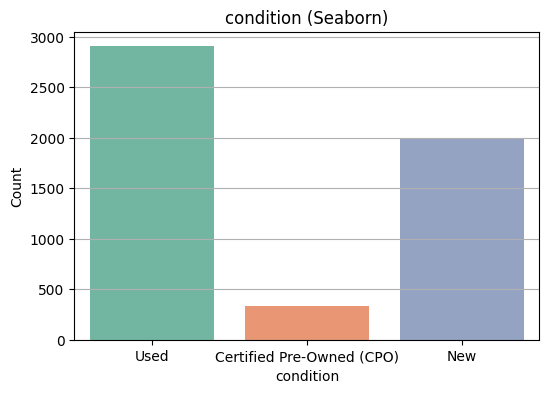

In [11]:
condition = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(df, x='condition', palette='Set2')
plt.title('condition (Seaborn)')
plt.xlabel('condition')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [12]:
condition_fig = px.pie(df, names='condition', title='condition Category', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
condition_fig.update_traces(textinfo='percent+label')
condition_fig.show()

ML Analysis:

The condition feature includes three categories: Used (55.49%), New (38.15%), and Certified Pre-Owned (CPO) (6.36%). The distribution is moderately imbalanced, with "Used" vehicles being the most common. From a machine learning perspective, this feature is very useful for predicting car prices, as vehicle condition is directly related to market value. The imbalance isn't extreme, so one-hot encoding can be applied without major issues.


Business insight and recommendation:

The data shows that used vehicles make up the largest share of the market at 55.49%, followed by new vehicles at 38.15%, and Certified Pre-Owned (CPO) vehicles at only 6.36%. This means the market is heavily skewed toward used cars, while CPO options remain a niche.

To make the most of this, the business should focus its main sales and marketing strategies on used cars, as they appeal to the majority of customers and offer competitive pricing. New vehicles should be positioned with financing plans or promotions to attract buyers willing to pay a premium for the latest models. CPO vehicles can be marketed as a high-quality alternative for customers seeking assurance of condition without paying full new-car prices, helping the business capture a more selective but valuable segment.

# Manufacturer

### Which manufacturers dominate the market?

In [13]:
manufacturers= df['manufacturer'].value_counts()

In [14]:
print(f"Number of unique manufacturer: {df['manufacturer'].nunique()}")
print("=" * 40)
print(f"Total of manufacturer:\n{df['manufacturer'].value_counts()}")

Number of unique manufacturer: 46
Total of manufacturer:
manufacturer
Jeep             542
Ford             509
Chevrolet        489
Nissan           393
Subaru           291
Honda            256
BMW              242
Mercedes-Benz    230
Toyota           214
Volkswagen       192
Kia              183
Audi             169
Lexus            153
Cadillac         144
RAM              132
Hyundai          109
INFINITI         104
Dodge             92
Lincoln           86
Mazda             82
GMC               74
Volvo             73
Chrysler          70
Buick             68
Acura             54
Porsche           47
Land              38
Jaguar            32
Mitsubishi        32
Alfa              24
MINI              22
Genesis           21
Scion             16
Maserati          12
Aston              9
Pontiac            8
Saab               6
Saturn             5
Hummer             3
Bentley            2
Mercury            2
Lotus              1
FIAT               1
Isuzu              1
Rolls-

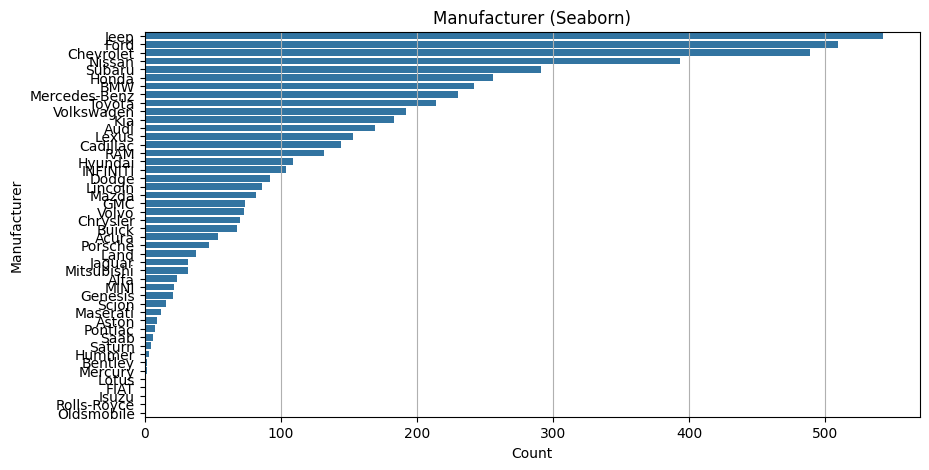

In [15]:
manufacturers= df['manufacturer'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=manufacturers.values, y=manufacturers.index)
plt.title('Manufacturer (Seaborn)')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.grid(axis='x')
plt.show()

In [16]:
manufacturers_fig = px.histogram(df, x="manufacturer", title="Most Common Manufacturers", color_discrete_sequence=['#2E8B57'], nbins=30, width=700, height=500, marginal='violin')

manufacturers_fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font=dict(size=20, color='#2E8B57'),
    xaxis=dict(showgrid=True, gridcolor='#d0f0c0'),
    yaxis=dict(showgrid=True, gridcolor='#d0f0c0')
)

manufacturers_fig.show()

Business insight and recommendation:

The data shows that Jeep is the most common brand in the dataset with 561 listings, followed by Ford with 534 and Chevrolet with 501. Other well-known brands like Nissan, Subaru, and Honda also appear frequently.

To make the most of this, the business should focus on popular brands like Jeep, Ford, and Chevrolet, since they have a strong presence and likely steady demand. These brands are familiar to many buyers, so highlighting availability, variety, and deals on these vehicles can help attract more customers and increase sales.

# Fuel Type

### Which fuel types are the most common?

In [17]:
print(f"Number of unique Fuel Type: {df['fuel_type'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each Fuel Type:\n{df['fuel_type'].value_counts()}")
print("=" * 40)
print(f"Percentage of Fuel Type:\n{(df['fuel_type'].value_counts(normalize=True) * 100).round(2)}")

Number of unique Fuel Type: 4
The Total Number of Each Fuel Type:
fuel_type
Gasoline     4755
Hybrid        273
Diesel        134
Flex Fuel      73
Name: count, dtype: int64
Percentage of Fuel Type:
fuel_type
Gasoline     90.83
Hybrid        5.21
Diesel        2.56
Flex Fuel     1.39
Name: proportion, dtype: float64


C:\Users\StARS\AppData\Local\Temp\ipykernel_10532\1912048479.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




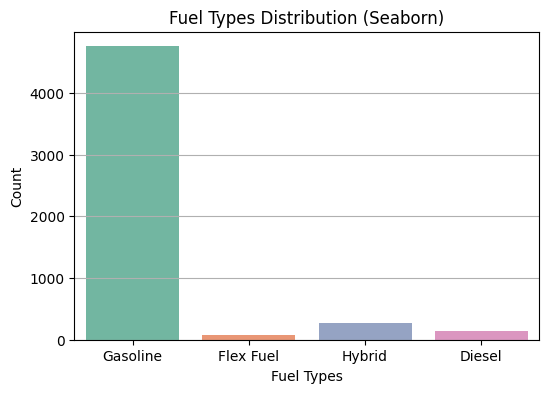

In [18]:
fuel_types = df['fuel_type'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_type', data=df, palette='Set2')
plt.title('Fuel Types Distribution (Seaborn)')
plt.xlabel('Fuel Types')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [19]:
fuel_types_fig = px.bar(df, x='fuel_type', title='Distribution of Fuel Types', color='fuel_type', color_discrete_sequence=["#2E8B57"], width=600, height=500)


fuel_types_fig.update_layout(
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    title_font=dict(size=20, color='#2E8B57'), 
    xaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Fuel Types"),  
    yaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Count"))

fuel_types_fig.show()

ML Analysis:

The fuel_type variable has four categories, with Gasoline accounting for over 90% of the data. This imbalance may limit the model’s ability to learn from the less frequent classes like Hybrid, Diesel, and Flex Fuel. Using one-hot encoding directly might cause problems because of these rare types. A better way is to group Hybrid, Diesel, and Flex Fuel into one group.This makes the data cleaner, helps the model avoid overfitting, and still keeps useful information about fuel type, which can affect the car’s price. Tree-based models handle such imbalance more effectively and proper encoding and handling of rare classes will help to avoid overfitting.

Business insight and recommendation:

The data shows that gasoline cars are by far the most common, with 4,886 listings. Hybrid cars are next with 285, while diesel and flex fuel cars are much less common.

To make the most of this, the business should continue focusing on gasoline vehicles, as they clearly dominate the market. At the same time, keeping some hybrid options available can help attract eco-conscious buyers or those looking to save on fuel costs.

# Exterior Color

### Which exterior colors are the most popular?

In [20]:
print(f"Number of unique Exterior Color: {df['exterior_color'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each Exterior Color:\n{df['exterior_color'].value_counts()}")
print("=" * 40)
print(f"Percentage of Exterior Color:\n{(df['exterior_color'].value_counts(normalize=True) * 100).round(2)}")

Number of unique Exterior Color: 8
The Total Number of Each Exterior Color:
exterior_color
Grey Shades                      2030
Black Shades                     1253
White Shades                     1101
Blue Shades                       292
Red Shades                        269
Others                            187
Green Shades                       52
Gold/ Brown and Orange Shades      51
Name: count, dtype: int64
Percentage of Exterior Color:
exterior_color
Grey Shades                      38.78
Black Shades                     23.94
White Shades                     21.03
Blue Shades                       5.58
Red Shades                        5.14
Others                            3.57
Green Shades                      0.99
Gold/ Brown and Orange Shades     0.97
Name: proportion, dtype: float64


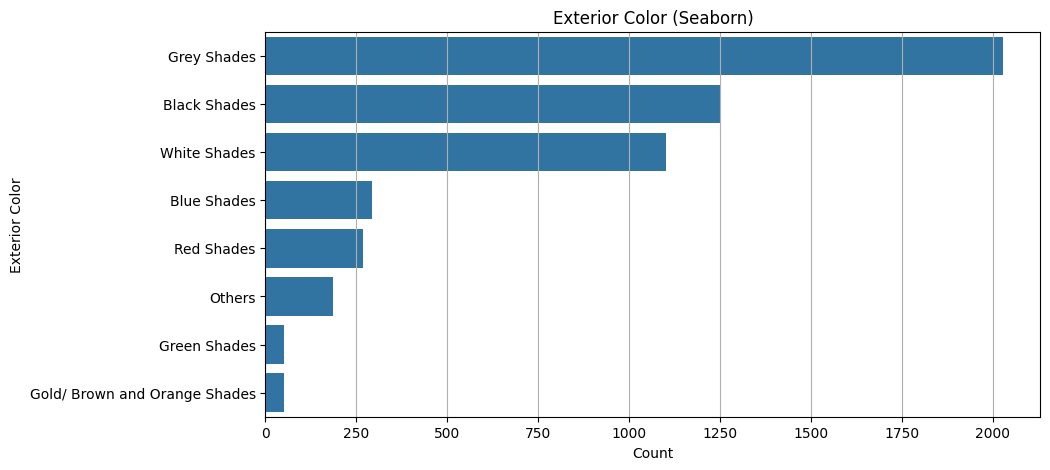

In [21]:
exterior_color = df['exterior_color'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=exterior_color.values, y=exterior_color.index)
plt.title('Exterior Color (Seaborn)')
plt.xlabel('Count')
plt.ylabel('Exterior Color')
plt.grid(axis='x')
plt.show()

In [22]:
exterior_color_fig = px.bar(df, x='exterior_color', title='Top Exterior Colors', color='exterior_color', color_discrete_sequence=["#2E8B57"], width=750, height=500)

exterior_color_fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', title_font=dict(size=20, color='#2E8B57'), xaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Exterior Color"), yaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Count"))

exterior_color_fig.show()

ML Analysis:

The exterior_color feature contains 8 categories, with the majority of vehicles falling into Grey (38.78%), Black (23.94%), and White Shades (21.03%). Together, these three represent over 83% of the dataset, while the remaining categories — specially Green Shades (0.99%) and Gold/Brown/Orange Shades (0.97%) — are underrepresented. From a machine learning perspective, this imbalance may reduce the predictive value of rare colors and increase the risk of overfitting if each category is encoded separately. To address this, it is recommended to use one-hot encoding for the color feature while grouping low-frequency categories (e.g., below 3%) into a single “Other” class. This will reduces noise and help the model perform better. Tree-based models can handle many categories better.

Business insight and recommendation:

The data shows that grey, black, and white cars are the most common exterior colors, with grey shades leading at over 2,000 listings. Blue and red are less common, while colors like gold, brown, orange, and green are very rare.

To make the most of this, the business should focus on stocking popular colors like grey, black, and white, since these are in high demand. For less common colors, offering them at a discount or pairing them with extra features could help attract buyers who want something different.

# interior color

### What are the most common interior color preferences among cars?

In [23]:
print(f"Number of unique interior_color: {df['interior_color'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each interior_color:\n{df['interior_color'].value_counts()}")
print("=" * 40)
print(f"Percentage of interior_color :\n{(df['interior_color'].value_counts(normalize=True) * 100).round(2)}")

Number of unique interior_color: 9
The Total Number of Each interior_color:
interior_color
Black Shades              3651
Grey and Silver Shades     648
Brown and Beige Shades     420
Others                     352
Red Shades                  70
White Shades                48
Blue Shades                 30
Green Shades                10
Orange/Yellow Shades         6
Name: count, dtype: int64
Percentage of interior_color :
interior_color
Black Shades              69.74
Grey and Silver Shades    12.38
Brown and Beige Shades     8.02
Others                     6.72
Red Shades                 1.34
White Shades               0.92
Blue Shades                0.57
Green Shades               0.19
Orange/Yellow Shades       0.11
Name: proportion, dtype: float64


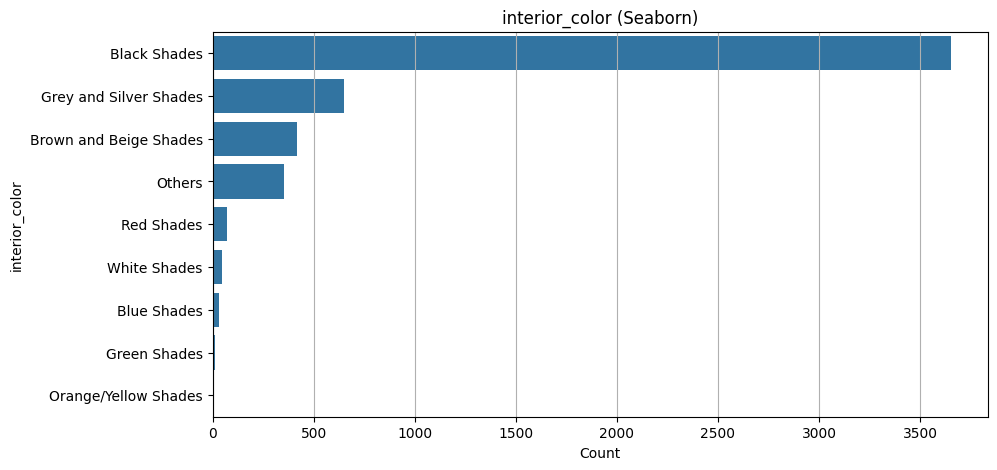

In [24]:
interior_color = df['interior_color'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=interior_color.values, y=interior_color.index)
plt.title('interior_color (Seaborn)')
plt.xlabel('Count')
plt.ylabel('interior_color')
plt.grid(axis='x')
plt.show()

In [25]:
interior_color_fig = px.bar(df, x='interior_color', title='Top Interior Colors', color='interior_color', color_discrete_sequence=["#2E8B57"], width=750, height=500)

interior_color_fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', title_font=dict(size=20, color='#2E8B57'), xaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Exterior Color"), yaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Count"))

interior_color_fig.show()

ML Anbalysis:

The interior color feature includes 9 categories, with a strong dominance of Black Shades (69.74%), followed by Grey and Silver (12.38%) and Brown and Beige (8.02%). All other colors combined make up less than 10% of the data, including very rare shades like Green and Orange/Yellow. From a machine learning perspective, this feature has a clear imbalance, and some categories have very few samples. Applying one-hot encoding without grouping may introduce noise or overfitting due to sparse classes. To improve model stability, you could group low-frequency colors into a single “Other” category. Interior color might indirectly affect price by reflecting luxury, preferences, so it can still add value to the model when handled properly.

Business insight and recommendation:

The data shows that black interior shades dominate the market at 69.74%, followed by grey/silver shades at 12.38% and brown/beige shades at 8.02%. All other colors combined make up less than 10%, with rare shades like green and orange/yellow representing under 0.2% each. This suggests that customers  prefer neutral and classic interiors, while bold colors remain niche choices.

To make the most of this, the business should keep a strong inventory of vehicles with black, and grey interiors, as they align with mainstream buyer preferences and resale value. Limited-stock, rare-color interiors can be marketed as exclusive or custom options for customers seeking unique styles, allowing the business to cater to both mass-market and specialty segments effectively.

# Drivetrain

### Which drivetrains are the most popular?

In [26]:
print(f"Number of unique Drivetrain: {df['drivetrain'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each Drivetrain:\n{df['drivetrain'].value_counts()}")
print("=" * 40)
print(f"Percentage of Each Drivetrain:\n{(df['drivetrain'].value_counts(normalize=True) * 100).round(2)}")

Number of unique Drivetrain: 4
The Total Number of Each Drivetrain:
drivetrain
All-wheel Drive      2273
Front-wheel Drive    1308
Four-wheel Drive     1170
Rear-wheel Drive      484
Name: count, dtype: int64
Percentage of Each Drivetrain:
drivetrain
All-wheel Drive      43.42
Front-wheel Drive    24.99
Four-wheel Drive     22.35
Rear-wheel Drive      9.25
Name: proportion, dtype: float64


C:\Users\StARS\AppData\Local\Temp\ipykernel_10532\1531253014.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




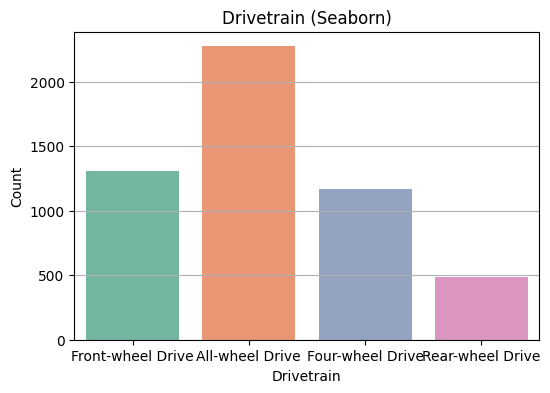

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(df, x='drivetrain', palette='Set2')
plt.title('Drivetrain (Seaborn)')
plt.xlabel('Drivetrain')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [28]:
drivetrain_fig = px.pie(df, names='drivetrain', title='Drivetrain Types', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
drivetrain_fig.update_traces(textinfo='percent+label')
drivetrain_fig.show()

ML Analysis:

The drivetrain includes four categories: All-wheel Drive (43.42%), Front-wheel Drive (24.99%), Four-wheel Drive (22.35%), and Rear-wheel Drive (9.25%). The distribution is fairly balanced, with each category having a reasonable sample size. This makes the feature suitable for one-hot encoding without needing to group any categories. From a machine learning perspective, drivetrain type can be a meaningful predictor of price, as it reflects a vehicle’s performance capabilities and market segment.

Business insight and recommendation:

The data shows that all-wheel drive is the most common drivetrain with 2,273 listings, followed by front-wheel and four-wheel drive. Rear-wheel drive is the least common, with under 500 listings.

To make the most of this, the business should focus on all-wheel and front-wheel drive vehicles, since they are most available and likely in higher demand. These drivetrains are popular for everyday use and all-weather driving, so highlighting their safety and performance can help attract more buyers.

# Transmission

### Which transmissions are the most popular?

In [29]:
print(f"Number of unique Transmissions: {df['transmission'].nunique()}")
print("=" * 50)
print(f"The Total Number of Each Transmission:\n{df['transmission'].value_counts()}")
print("=" * 50)
print(f"Percentage of Transmissions:\n{(df['transmission'].value_counts(normalize=True) * 100).round(2)}")

Number of unique Transmissions: 6
The Total Number of Each Transmission:
transmission
Fully Automatic                             4807
Manual Transmission                          176
Tiptronic / Shiftable Automatic              104
Continuously Variable Transmission (CVT)      83
Semi-Automatic / Dual-Clutch                  59
Single-Speed or Direct Drive                   6
Name: count, dtype: int64
Percentage of Transmissions:
transmission
Fully Automatic                             91.82
Manual Transmission                          3.36
Tiptronic / Shiftable Automatic              1.99
Continuously Variable Transmission (CVT)     1.59
Semi-Automatic / Dual-Clutch                 1.13
Single-Speed or Direct Drive                 0.11
Name: proportion, dtype: float64


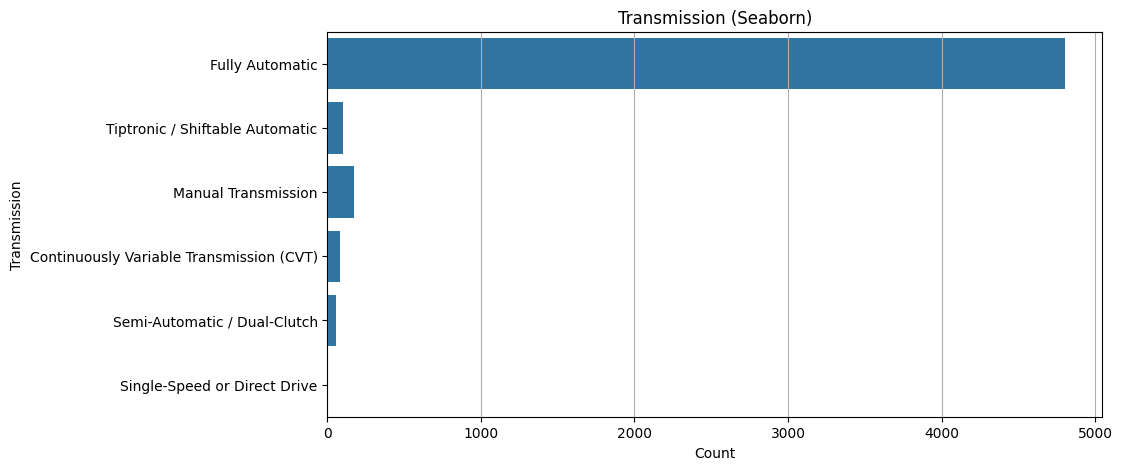

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='transmission')  # y-axis is category, counts are automatic
plt.title('Transmission (Seaborn)')
plt.xlabel('Count')
plt.ylabel('Transmission')
plt.grid(axis='x')
plt.show()

In [31]:
transmission = df['transmission'].value_counts().reset_index()

transmission_fig = px.line(transmission, x='transmission', y='count', title='Count of Vehicles by Transmission Type', markers=True, color_discrete_sequence=['#2E8B57'], width=750, height=500)

transmission_fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', title_font=dict(size=20, color='#2E8B57'), xaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Transmission"), yaxis=dict(showgrid=True, gridcolor='#d0f0c0', title="Count"))

transmission_fig.show()

ML Analysis:

The transmission column has six different transmission types, but the distribution is highly imbalanced. Over 91% of vehicles have a Fully Automatic transmission, while the remaining types — including Manual, Tiptronic/Shiftable Automatic, CVT, Dual-Clutch, and Single-Speed — make up less than 9% combined. From a machine learning perspective, this imbalance can create issues, especially if one-hot encoding is used directly. Rare categories can introduce noise and may not provide enough information for the model to learn from. To improve model performance and reduce dimensionality, it is better to group the less frequent types into a single category like "Other." This way, the model will focus more on meaningful patterns rather than being distracted by rare cases. Transmission type may be a helpful predictor of vehicle price because it’s often linked to driving experience and vehicle segment.

Business insight and recommendation:

The data shows that fully automatic cars are by far the most common, with 4,946 listings. Manual and other transmission types like CVT or tiptronic are much less common, and single-speed is very rare.

To make the most of this, the business should focus mainly on fully automatic cars, since they clearly dominate the market and match most buyers' preferences. For buyers looking for performance or fuel efficiency, offering a few manual or CVT options can add variety and help meet different needs.

# State

### What is the distribution of cars across different states?

In [32]:
print(f"Number of unique state: {df['state'].nunique()}")
print("=" * 40)
print(f"The Total Number of Each state:\n{df['state'].value_counts()}")
print("=" * 40)
print(f"Percentage of state :\n{(df['state'].value_counts(normalize=True) * 100).round(2)}")

Number of unique state: 2
The Total Number of Each state:
state
Illinois    5021
Indiana      214
Name: count, dtype: int64
Percentage of state :
state
Illinois    95.91
Indiana      4.09
Name: proportion, dtype: float64


In [33]:
state_fig = px.pie(df, names='state', title='state', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
state_fig.update_traces(textinfo='percent+label')
state_fig.show()

ML Analysis:

There are only two states in the dataset: Illinois and Indiana. Most of the vehicles (about 96%) are from Illinois, while only 4% are from Indiana. This shows that the data is not balanced between the two states. Since Indiana has very few records, it may not be very useful for training a machine learning model. We can still use OneHotEncoding, but the model might not learn much from the Indiana data because it's such a small part of the dataset.

Business insight and recommendation:

The data shows that almost all vehicles in the dataset are located in Illinois (95.91%), with only a small share in Indiana (4.09%). This indicates that the market coverage is heavily concentrated in Illinois, while Indiana remains a much smaller segment.

To make the most of this, the business should continue strengthening its presence in Illinois through targeted promotions and partnerships, as it’s the core sales area. At the same time, there’s potential to expand in Indiana by increasing marketing efforts, offering special deals, or partnering with local dealerships to grow market share in that region.

# Model Year

### What is the distribution of cars model year

In [34]:
df['model_year'].value_counts()

model_year
2024    1913
2021     512
2023     399
2020     382
2019     296
2022     274
2018     218
2017     208
2016     180
2015     132
2014     121
2013     115
2012      88
2011      52
2008      50
2010      49
2006      38
2007      34
2005      28
2009      27
2004      22
2025      16
2002      11
2003      11
2001       7
1999       7
1994       6
1984       4
2000       4
1998       4
1991       4
1988       3
1993       3
1995       3
1990       3
1992       2
1989       2
1987       2
1997       2
1996       2
1982       1
Name: count, dtype: int64

Summary statistics for Model Year:
count    5235.000000
mean     2019.906399
std         5.413052
min      1982.000000
25%      2018.000000
50%      2021.000000
75%      2024.000000
max      2025.000000
Name: model_year, dtype: float64


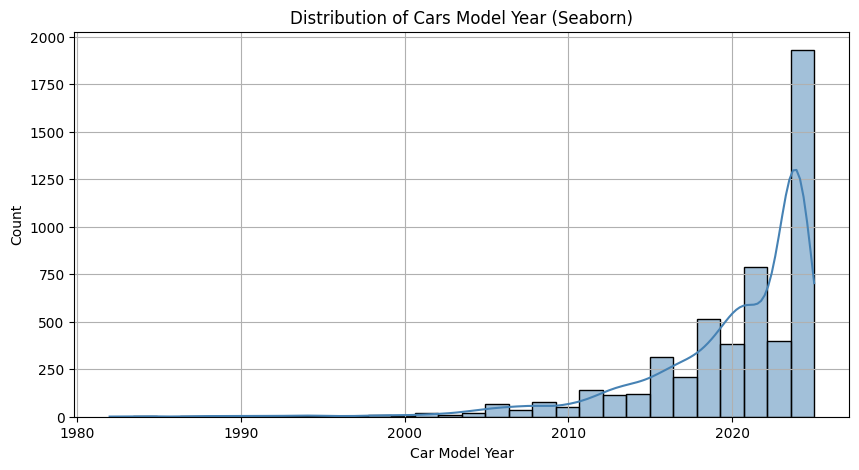

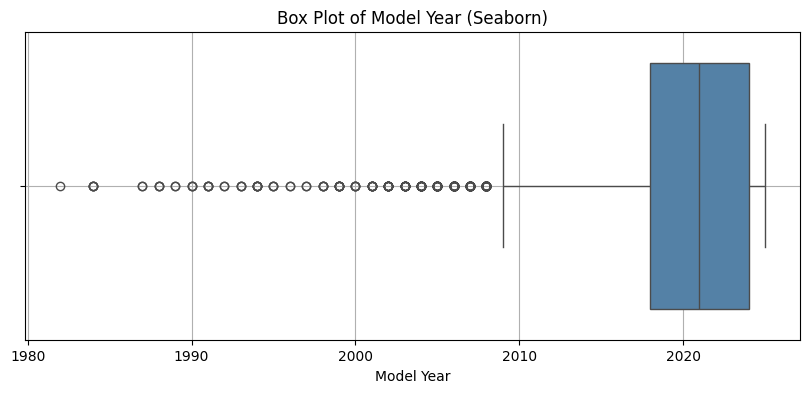

In [35]:
print("Summary statistics for Model Year:")
print(df['model_year'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['model_year'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Cars Model Year (Seaborn)')
plt.xlabel('Car Model Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['model_year'], color='steelblue')
plt.title('Box Plot of Model Year (Seaborn)')
plt.xlabel('Model Year')
plt.grid(True)
plt.show()

In [36]:
model_year_counts = df['model_year'].value_counts().sort_index().reset_index()

model_year_fig = px.bar(model_year_counts, x='model_year', y='count', title='Number of Cars by Model Year', color_discrete_sequence=['#2E8B57'], width=750, height=500)

model_year_fig.show()

The model_year ranges from 1982 to 2025, with the highest counts concentrated in recent years. The most common year is 2024 with 1,913 vehicles,followed by 2021 (512) and 2023 (399).
Older models (pre-2005) appear in very small numbers, indicating they are rare in the dataset. The distribution is heavily skewed toward newer vehicles, with a steep drop in counts as cars get older suggesting a strong potential relationship with price, as newer cars typically cost more.
The dominance of recent years may bias the model toward learning patterns for newer cars, reducing accuracy for older models. The large gap between the oldest and newest cars may cause non-linear price relationships, especially since car depreciation isn’t linear over decades. To reduce noise, it's more effective to convert model_year into a numerical feature. or to scale it and use non_linear models that best deal with outliers

Business insight and recommendation:

The data shows that most vehicles are from recent model years, with 2024 dominating at 1,913 units, followed by 2021 (512) and 2023 (399). Older vehicles, especially those before 2010, are much less common. This indicates that the market is heavily focused on newer cars, appealing to buyers seeking the latest models, features, and reliability.

To make the most of this, the business should highlight these newer models in marketing campaigns, emphasizing modern technology, fuel efficiency, and warranty benefits. Limited older models can be positioned as budget-friendly options for customers who prioritize affordability over having the latest features. Offering financing deals on recent models can further attract buyers ready to upgrade.

# Bivariat Analysis

# Which manufacturers command the highest car prices?

In [37]:
manufacturer_pri = df.groupby("manufacturer")["price"].sum().sort_values(ascending=False).reset_index()
manufacturer_pri

,manufacturer,price
0,Jeep,21292802
1,Ford,16626990
2,Chevrolet,13584185
3,Nissan,10614392
4,Mercedes-Benz,10337379
5,Subaru,9855414
6,BMW,8349434
7,Honda,8005967
8,Toyota,7136095
9,RAM,6863502


C:\Users\StARS\AppData\Local\Temp\ipykernel_10532\145791831.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




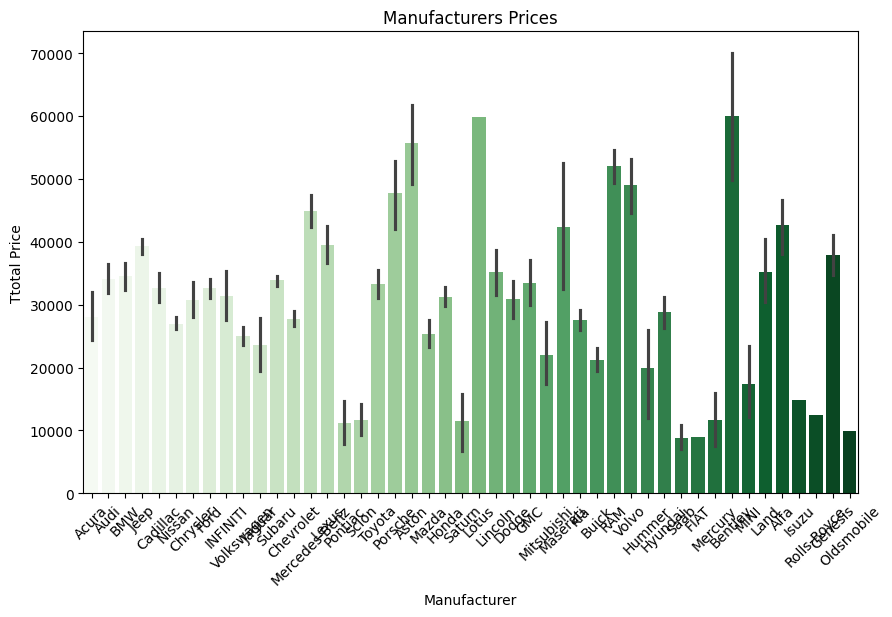

In [38]:
plt.figure(figsize=(10, 6))

sns.barplot(df, x='manufacturer', y='price', palette='Greens')
plt.title("Manufacturers Prices")
plt.xlabel("Manufacturer")
plt.ylabel("Ttotal Price")
plt.xticks(rotation=45)

plt.show()

In [39]:
manufacturer_pri_fig = px.bar(df, x="manufacturer", y="price", color="manufacturer", title="Total Manufacturers Prices", color_discrete_sequence=px.colors.sequential.Greens, width=1000, height=500)
manufacturer_pri_fig.show()

ML Analysis:

From a machine learning perspective, manufacturer has a clear influence on price. Brands like Jeep, Ford, and Chevrolet lead in total sales value, largely due to their high sales volume, while luxury brands such as Porsche, Aston Martin, and Bentley achieve high per-unit prices but contribute less to total sales because they sell fewer vehicles.
This variation makes manufacturer a valuable categorical feature for predicting price. When encoded, the model can learn that mass-market brands often have a wide price range depending on the model and condition, while luxury brands are typically associated with higher-priced vehicles even if their total market value is lower.
Additionally, combining manufacturer with features like condition, model_year, and mileage can boost prediction accuracy, as luxury brands can still have lower-priced older models, and economy brands may offer high-priced special or limited editions.

Business insight and recommendation:

The data shows that Jeep leads in total cars sales value at over 21M, followed by Ford (16.6M) and Chevrolet (13.6M). Luxury brands like Mercedes-Benz, BMW, and Lexus also rank high, contributing significantly to revenue despite smaller unit counts, likely due to higher prices. On the other hand, niche luxury brands such as Bentley, Lotus, and Rolls-Royce contribute less overall due to their exclusivity and limited sales volume.

Recommendation:

To make the most of this, focus on keeping strong sales for top brands like Jeep and Ford, and run targeted ads for luxury brands to attract high-income buyers. Offer deals on mid-tier brands like Lexus and Audi to boost sales.

# How do prices differ in cars' conditions?

In [40]:
price_by_condition = df.groupby("condition")["price"].sum().round(2).reset_index()
price_by_condition

,condition,price
0,Certified Pre-Owned (CPO),12028478
1,New,86914156
2,Used,74524841


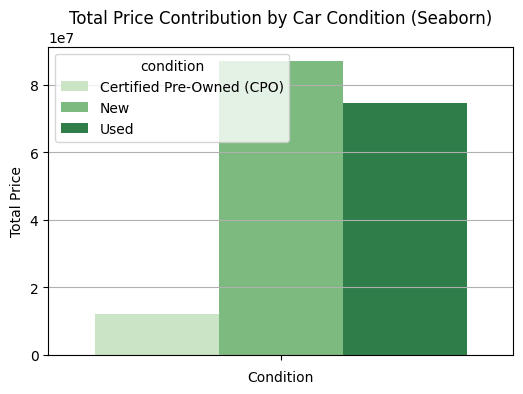

In [41]:
plt.figure(figsize=(6, 4))
sns.barplot(price_by_condition, hue='condition', y='price', palette='Greens')
plt.title('Total Price Contribution by Car Condition (Seaborn)')
plt.xlabel('Condition')
plt.ylabel('Total Price')
plt.grid(axis='y')

plt.show()

In [42]:
price_by_condition_fig = px.pie(price_by_condition, names='condition', values='price', title='Total Price Condition by Car Condition', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
price_by_condition_fig.update_traces(textinfo='percent+label')
price_by_condition_fig.show()


ML Analysis:

From a machine learning viewpoint, condition has a strong impact on price. New cars have the highest average price (43,522), followed by Certified Pre-Owned (36,122), and Used cars (25,654). This clear price gap makes condition a valuable categorical feature for predicting car prices.
In ML models, encoding condition will help the model learn that new cars generally cost more, CPO cars are mid-range, and used cars are usually cheaper.

Business Insight:
The data shows that new cars have the highest total sales value at about 86.9 million, followed by used cars at around 74.5 million. Certified pre-owned (CPO) cars have the lowest total sales value at approximately 12 million. This means buyers spend most on new cars, but used cars also represent a large part of the market.

Recommendation:
To make the most of this, the business should focus on promoting new cars to attract buyers looking for the latest features, safety, and technology. Used cars also have strong sales, so offering competitive pricing and good quality guarantees can keep attracting cost-conscious buyers. Certified pre-owned cars make up a smaller share, so promoting them as a reliable, affordable middle option could help grow that segment.

# What is the price distribution for different drivetrain types?

In [43]:
sum_price_by_drivetrain = df.groupby("drivetrain")["price"].sum().reset_index().sort_values(by='price', ascending=False)
sum_price_by_drivetrain

,drivetrain,price
0,All-wheel Drive,78715327
1,Four-wheel Drive,48952109
2,Front-wheel Drive,28983666
3,Rear-wheel Drive,16816373


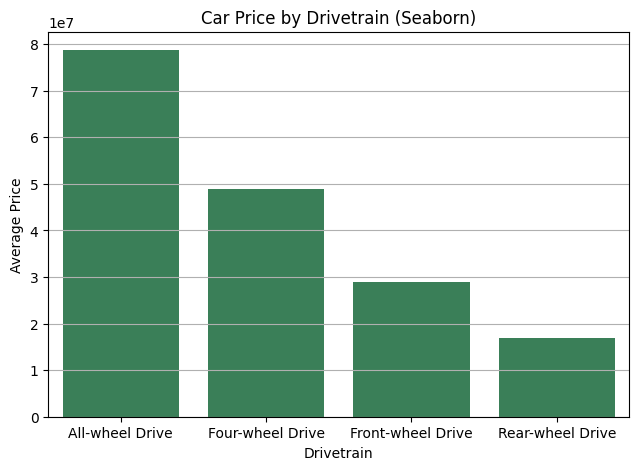

In [44]:
plt.figure(figsize=(7.5, 5))
sns.barplot(data=sum_price_by_drivetrain, x='drivetrain', y='price', color="#2E8B57")
plt.title('Car Price by Drivetrain (Seaborn)')
plt.xlabel('Drivetrain')
plt.ylabel('Average Price')
plt.grid(axis='y')

plt.show()

In [45]:
sum_price_by_drivetrain_fig = px.line(sum_price_by_drivetrain, x='drivetrain', y='price', title='Car Price by Drivetrain', markers=True, color_discrete_sequence=["#2E8B57"], width=750, height=500)

sum_price_by_drivetrain_fig.update_layout(xaxis_title='Drivetrain', yaxis_title='Average Price')

sum_price_by_drivetrain_fig.show()

ML Analysis:

From a machine learning perspective, drivetrain shows a clear relationship with total price contribution. All-wheel Drive cars lead with the highest total sales (78.7M), followed by Four-wheel Drive (48.9M), Front-wheel Drive (28.9M), and Rear-wheel Drive (16.8M).
This indicates that drivetrain type could be a strong categorical predictor for price. In ML models, encoding this feature (e.g., one-hot encoding) will allow the model to capture how performance-oriented drivetrains like All-wheel or Four-wheel Drive are generally linked with higher-priced vehicles, while Front-wheel and Rear-wheel Drive tend to be in lower price ranges.

Business insight and recommendation:

All-wheel drive vehicles lead in total sales value (78.7M), followed by four-wheel drive ($48.9M). Front-wheel drive (28.9M) and rear-wheel drive (16.8M) bring in less revenue, suggesting higher demand for all-wheel drive and four-wheel drive vehicles.

Recommendation:

To make the most of this, the business should focus more on selling all-wheel and four-wheel drive vehicles. These types are likely popular for their safety, performance, and handling in different road conditions. Highlighting these benefits in ads—especially in areas with tough weather—can help attract more buyers and increase revenue.

# Which model years dominate the market and what are their total prices?


In [46]:
price_by_year_model = df.groupby("model_year")["price"].sum().reset_index().sort_values(by='price', ascending=False)
price_by_year_model

,model_year,price
39,2024,82639223
38,2023,16774137
36,2021,16120761
35,2020,11181687
37,2022,9846594
34,2019,7925661
33,2018,5619738
32,2017,4637892
31,2016,3846689
30,2015,2583128


In [47]:
sum_price_by_year_model = df.groupby("model_year")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
sum_price_by_year_model

,model_year,price
39,2024,82639223
38,2023,16774137
36,2021,16120761
35,2020,11181687
37,2022,9846594
34,2019,7925661
33,2018,5619738
32,2017,4637892
31,2016,3846689
30,2015,2583128


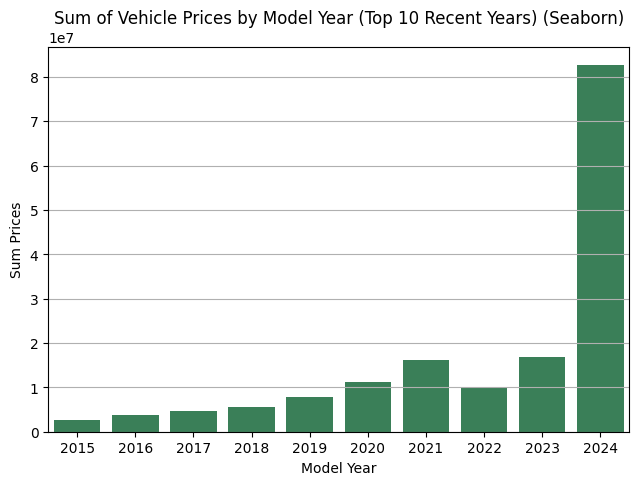

In [48]:
plt.figure(figsize=(7.5, 5))
sns.barplot(sum_price_by_year_model, x='model_year', y='price', color="#2E8B57")
plt.title("Sum of Vehicle Prices by Model Year (Top 10 Recent Years) (Seaborn)")
plt.xlabel("Model Year")
plt.ylabel("Sum Prices")
plt.grid(axis='y')
plt.show()

In [49]:
sum_price_by_year_model_fig = px.bar(sum_price_by_year_model, x="model_year", y="price", text="price", title="Sum of Vehicle Prices by Model Year (Top 10 Recent Years)", color_discrete_sequence=["#2E8B57"], labels={"price": "Sum Prices", "model_year": "Model Year"}, width=750, height=500)

sum_price_by_year_model_fig.show()

ML Analysis:

From a machine learning perspective, model_year has a clear relationship with price — newer cars (2024, 2023, 2021) contribute much higher total prices compared to older models. This pattern suggests that model_year is strongly correlated with price, likely because newer cars are more valuable.

For ML models, model_year can be a very powerful numerical feature. It can be used directly or transformed into car age (current_year - model_year) to better capture depreciation effects. The model can then learn that as the car’s year decreases (or age increases), the expected price drops. This makes it a key feature for accurate price predictions.

Business insight and recommendation:

The 2024 models dominate sales value at 82.6M—far ahead of other years. 2023, 2021, and 2020 follow with 16.8M, 16.1M, and 11.2M, respectively. Older models show a clear drop in total sales value, indicating buyers prefer newer cars.

Recommendation:

Focus on promoting and stocking newer model years (2022–2024) as they attract the highest spending. Offer targeted discounts or financing plans on older models to help move inventory without heavily impacting profit margins.

# How do fuel types impact pricing?

In [50]:
fuel_pri= df.groupby("fuel_type")["price"].sum().reset_index().sort_values(by='price', ascending=False)
fuel_pri

,fuel_type,price
2,Gasoline,153012962
3,Hybrid,11316455
0,Diesel,7200488
1,Flex Fuel,1937570


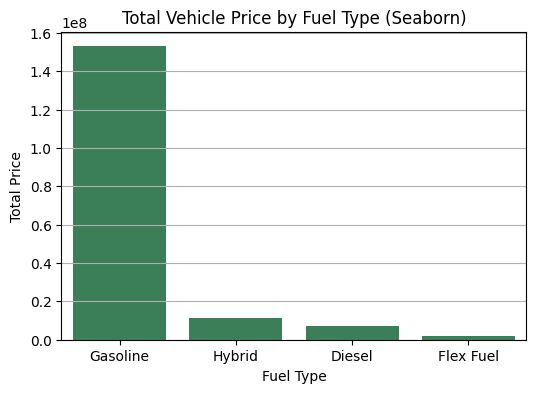

In [51]:
plt.figure(figsize=(6, 4))
sns.barplot(data=fuel_pri, x='fuel_type', y='price', color="#2E8B57")
plt.title('Total Vehicle Price by Fuel Type (Seaborn)')
plt.xlabel('Fuel Type')
plt.ylabel('Total Price')
plt.grid(axis='y')
plt.show()

In [52]:
fuel_pri_fig = px.pie(fuel_pri, names='fuel_type', values='price', title='Total Vehicle Price by Fuel Type', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
fuel_pri_fig.update_traces(textinfo='percent+label')
fuel_pri_fig.show()

ML Analysis:

From a machine learning perspective, the fuel type data is heavily imbalanced, with gasoline-powered vehicles making up most of the dataset’s total value. Alternative fuel vehicles like hybrids, diesel, and flex-fuel cars represent only a small share, which can make it harder for the model to accurately predict prices for these less common categories. This imbalance can bias regression models toward gasoline pricing patterns, while the small sample sizes for flex-fuel and diesel vehicles may cause unstable results in linear models. Also, the impact of fuel type on price may change depending on factors like manufacturer, drivetrain, or vehicle age, meaning that simple one-hot encoding might miss important patterns.

Business insight and recommendation:

Gasoline-powered vehicles lead sales by a huge margin at 153M, followed by hybrids at 11.3M. Diesel and Flex Fuel vehicles make up only a small portion of total sales.

Recommendation:

Continue prioritizing gasoline vehicles for inventory, but also expand hybrid offerings to capture the growing eco-conscious market. Diesel and Flex Fuel could be stocked in limited quantities for niche buyers.

# How do exterior colors affect pricing?

In [53]:
price_by_colors= df.groupby("exterior_color")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(5)
price_by_colors

,exterior_color,price
4,Grey Shades,65903761
0,Black Shades,43013356
7,White Shades,38852321
1,Blue Shades,8701804
6,Red Shades,7908234


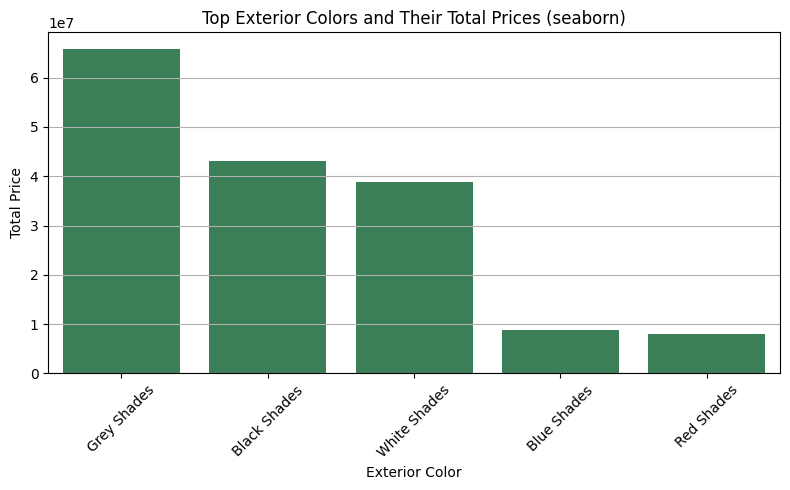

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(price_by_colors, x="exterior_color", y="price", color="#2E8B57")
plt.title("Top Exterior Colors and Their Total Prices (seaborn)")
plt.xlabel("Exterior Color")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [55]:
price_by_colors_fig = px.scatter(price_by_colors, x="exterior_color", y="price", text="price", title="Top Exterior Colors and Their Total Prices", color="exterior_color", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"exterior_color": "Exterior Color", "price": "Price"})

price_by_colors_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))

price_by_colors_fig.show()

In [56]:
### alternative or another way for visualization

price_by_colors_fig = px.bar(
    price_by_colors,
    x="exterior_color", y="price",
    title="Top Exterior Colors and Their Total Prices",
    color="exterior_color",
    color_discrete_sequence=px.colors.sequential.Greens,
    width=750, height=500
)

price_by_colors_fig.show()

ML Abalysis:

From a machine learning perspective, the exterior color data is imbalanced, with colors like grey, black, and white dominating in both sales volume and total value. Less common colors such as blue and red contribute less to the total value, likely due to fewer vehicles and possibly lower market demand. 

Business insight and recommendation:

Grey, black, and white shades dominate sales, with grey leading at $65.9M. Blue and red shades have much lower sales, together making up less than 10% of total revenue.

Recommendation:

Maintain strong inventory for grey, black, and white vehicles to meet high demand. Offer blue and red as limited but attractive options for customers seeking more vibrant colors.

# How does the total car sales price vary across different transmission types?

In [57]:
price_by_transmission= df.groupby("transmission")["price"].sum().reset_index().sort_values(by='price', ascending=False)
price_by_transmission

,transmission,price
1,Fully Automatic,159837858
2,Manual Transmission,5012047
5,Tiptronic / Shiftable Automatic,4190497
0,Continuously Variable Transmission (CVT),2197781
3,Semi-Automatic / Dual-Clutch,1996723
4,Single-Speed or Direct Drive,232569


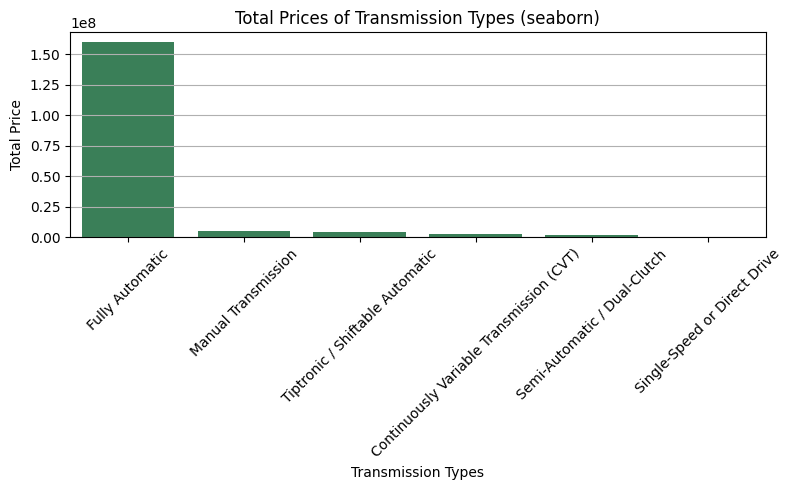

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(price_by_transmission, x="transmission", y="price", color="#2E8B57")
plt.title("Total Prices of Transmission Types (seaborn)")
plt.xlabel("Transmission Types")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [59]:
price_by_transmission_fig = px.scatter(price_by_transmission, x="transmission", y="price", text="price", title="Transmission Types and Their Total Prices", color="transmission", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"transmission": "Transmission Types", "price": "Price"})

price_by_transmission_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))

price_by_transmission_fig.show()

ML Analysis:

From a machine learning perspective, the transmission types are highly imbalanced, with fully automatic vehicles accounting for the vast majority of the total sales value. Less common types like manual, tiptronic, CVT, semi-automatic, and single-speed transmissions represent only a small fraction of the dataset's total price value. This imbalance can make it challenging for regression models to accurately predict prices for these less frequent transmission categories, potentially biasing predictions toward the pricing patterns of fully automatic vehicles.

Business Insight:
Most of the sales money comes from cars with fully automatic transmissions. This shows that most buyers prefer these types of cars. Manual and other types of transmissions sell much less, so they are less popular.

Recommendation:

It’s a good idea to focus on selling more fully automatic cars since they bring in most of the money. Yet, keeping some of manual and other transmission types will help attract different kinds of buyers. Special offers can be offered to make these less popular cars more interesting to customers.

# How does price vary by drivetrain type, and which drivetrain delivers the highest return across fuel type?

In [60]:
price_by_drivetrain_fuel_type = df.groupby(['drivetrain', 'fuel_type'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
price_by_drivetrain_fuel_type

,drivetrain,fuel_type,price
2,All-wheel Drive,Gasoline,71796859
6,Four-wheel Drive,Gasoline,41050948
10,Front-wheel Drive,Gasoline,27178358
14,Rear-wheel Drive,Gasoline,12986797
3,All-wheel Drive,Hybrid,6533594
4,Four-wheel Drive,Diesel,3917270
7,Four-wheel Drive,Hybrid,3240116
12,Rear-wheel Drive,Diesel,3025190
11,Front-wheel Drive,Hybrid,1492762
13,Rear-wheel Drive,Flex Fuel,754403


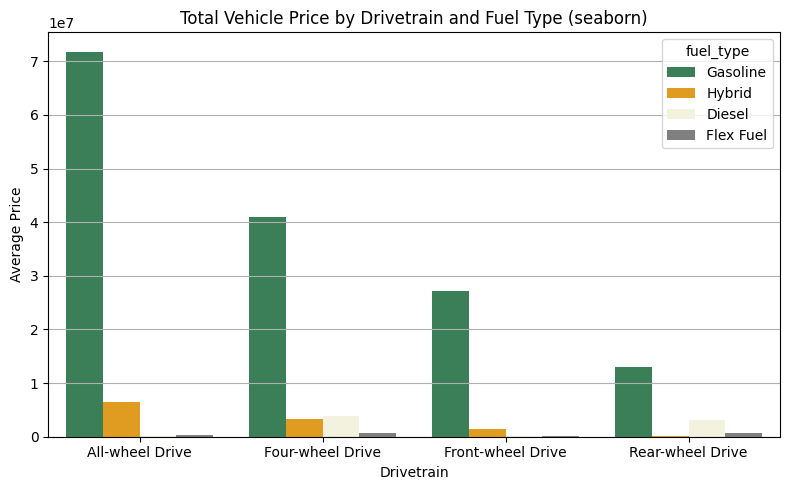

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(data=price_by_drivetrain_fuel_type, x='drivetrain', y='price', hue='fuel_type',palette=['#2E8B57', '#FFA500', '#F5F5DC', '#808080'])
plt.title('Total Vehicle Price by Drivetrain and Fuel Type (seaborn)')
plt.xlabel('Drivetrain')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [62]:
price_by_drivetrain_fuel_type_fig = px.bar(price_by_drivetrain_fuel_type, x='drivetrain', y='price', color='fuel_type', barmode='group', title='Total Vehicle Price by Drivetrain and Fuel Type', color_discrete_sequence=['#2E8B57', '#FFA500', '#F5F5DC', '#808080'], labels={"price": "Average Price", "drivetrain": "Drivetrain", "fuel_type": "Fuel Type"}, width=750, height=500)
price_by_drivetrain_fuel_type_fig.show()

Business insight and recommendation:

Gasoline-powered vehicles dominate across all drivetrain types, especially All-wheel Drive and Four-wheel Drive, together generating over $112M in sales. Hybrids perform notably well in All-wheel Drive, while diesel sales are concentrated in Four-wheel and Rear-wheel Drive. Flex Fuel remains the least contributing category across all drivetrains.

Recommendation:

To make the most of this, the business should focus on selling gasoline cars with all-wheel or four-wheel drive, as these are clearly in high demand. At the same time, hybrid all-wheel drive cars also show growing interest, so promoting them as fuel-efficient options with strong performance could help attract more buyers looking for both power and savings.

# How do car manufacturers and car conditions afect pricing? 

In [63]:
manufacturer_price_by_cond = df.groupby(["manufacturer", "condition"])["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
manufacturer_price_by_cond

,manufacturer,condition,price
52,Jeep,New,16267337
30,Ford,New,9521397
92,Subaru,New,8302362
21,Chevrolet,Used,6726364
31,Ford,Used,6300880
11,BMW,Used,6063813
78,Nissan,New,5993792
20,Chevrolet,New,5243920
85,RAM,New,5109960
72,Mercedes-Benz,New,4805184


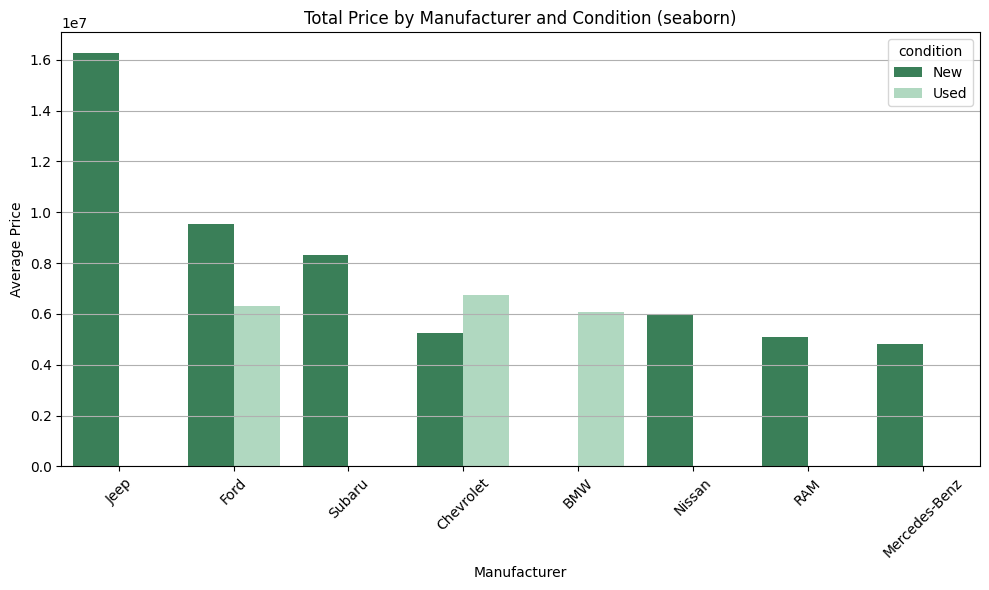

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=manufacturer_price_by_cond, x='manufacturer', y='price', hue='condition', palette=["#2E8B57", "#A9DFBF"])
plt.title('Total Price by Manufacturer and Condition (seaborn)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
manufacturer_price_by_cond_fig = px.histogram( manufacturer_price_by_cond, x='manufacturer', y='price', color='condition', barmode='group', title='Total Price by Manufacturer and Condition', labels={'price': 'Average Price', 'manufacturer': 'Manufacturer'}, color_discrete_sequence=["#2E8B57", "#A9DFBF"], width=750, height=500)

manufacturer_price_by_cond_fig.show()

Business insight and recommendation:

New vehicles from Jeep, Ford, and Subaru lead in revenue, with Jeep alone contributing over $16M in sales. Among used cars, Chevrolet, Ford, and BMW dominate, showing strong demand for both budget-friendly and luxury segments.

Recommendation:

Maintain strong stock of new Jeeps, Fords, and Subarus to capture high-value sales. For used vehicles, continue promoting Chevrolet, Ford, and BMW to attract cost-conscious buyers. Consider offering financing and certified pre-owned options to boost used car sales further.

#  Multivariate Analysis

In [66]:
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)

Index(['mileage_mi', 'price', 'model_year', 'car_age'], dtype='object')


In [67]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,mileage_mi,price,model_year,car_age
mileage_mi,1.000000,-0.650445,-0.695105,0.695105
price,-0.650445,1.000000,0.546003,-0.546003
model_year,-0.695105,0.546003,1.000000,-1.000000
car_age,0.695105,-0.546003,-1.000000,1.000000


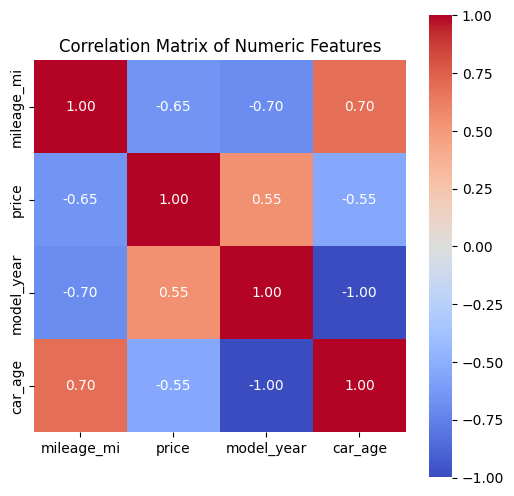

In [68]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Key Findings:

Mileage has a strong negative correlation with price — meaning higher mileage generally lowers the vehicle’s price.

Model Year shows a strong positive correlation with price — newer cars tend to have higher prices.

Car Age is strongly negatively correlated with price and strongly positively correlated with mileage, indicating multicollinearity.

High correlations between features like model_year and car_age suggest redundancy — including both could cause multicollinearity in linear models.


Recommendations:

Keep mileage and model_year as strong predictors for regression models.

Avoid including both model_year and car_age together in models like Linear Regression to prevent multicollinearity.

Low-correlation features may still be useful for non-linear models (e.g., Random Forest, XGBoost), so don’t remove them solely based on correlation.

In [69]:
cat_cols= df.select_dtypes(include='O').columns
print(cat_cols)

Index(['condition', 'state', 'manufacturer', 'fuel_type', 'drivetrain',
       'transmission', 'exterior_color', 'interior_color',
       'accidents_or_damage', '1_owner_vehicle'],
      dtype='object')


In [70]:
for col in cat_cols:
    print(f"\n📌 The distribution of '{col}")
    print("=" * 50)
    print(df[col].value_counts())



📌 The distribution of 'condition
condition
Used                         2905
New                          1997
Certified Pre-Owned (CPO)     333
Name: count, dtype: int64

📌 The distribution of 'state
state
Illinois    5021
Indiana      214
Name: count, dtype: int64

📌 The distribution of 'manufacturer
manufacturer
Jeep             542
Ford             509
Chevrolet        489
Nissan           393
Subaru           291
Honda            256
BMW              242
Mercedes-Benz    230
Toyota           214
Volkswagen       192
Kia              183
Audi             169
Lexus            153
Cadillac         144
RAM              132
Hyundai          109
INFINITI         104
Dodge             92
Lincoln           86
Mazda             82
GMC               74
Volvo             73
Chrysler          70
Buick             68
Acura             54
Porsche           47
Land              38
Jaguar            32
Mitsubishi        32
Alfa              24
MINI              22
Genesis           21
Scion     

In [71]:
def category_price_analysis(col):
    total_df = df.groupby(col)['price'].sum().sort_values(ascending=False)
    print(f"\n📌 Total Car Prices by '{col}':\n", total_df)
    return total_df

In [72]:
for col in cat_cols:
    category_price_analysis(col) 


📌 Total Car Prices by 'condition':
 condition
New                          86914156
Used                         74524841
Certified Pre-Owned (CPO)    12028478
Name: price, dtype: int64

📌 Total Car Prices by 'state':
 state
Illinois    167021372
Indiana       6446103
Name: price, dtype: int64

📌 Total Car Prices by 'manufacturer':
 manufacturer
Jeep             21292802
Ford             16626990
Chevrolet        13584185
Nissan           10614392
Mercedes-Benz    10337379
Subaru            9855414
BMW               8349434
Honda             8005967
Toyota            7136095
RAM               6863502
Lexus             6044062
Audi              5759132
Kia               5036410
Volkswagen        4797326
Cadillac          4708037
Volvo             3577387
INFINITI          3263197
Hyundai           3136703
Lincoln           3026615
Dodge             2837677
GMC               2480178
Porsche           2241848
Chrysler          2151418
Mazda             2082148
Acura             1514848
B

# Answers to the questions asked

Questions

1- What is the distribution of car conditions, and how does condition influence car pricing?

2- Which manufacturers dominate the market, and which command the highest car prices?

3- What are the most frequent fuel types, and how do these influence pricing?

4- Which exterior colors are preferred, and how are they related to car prices?

5- Which drivetrain types are most frequently seen, and how do they affect pricing?

6- Which transmissions are used most often, and how do they affect car prices?

7- How are car model years distributed, and what is their relationship with pricing?


Answers

1. What is the distribution of car conditions, and how does condition influence car pricing?

Distribution: The majority of vehicles sold are Used (2,905), followed by New (1,997), and Certified Pre-Owned (CPO) (333).
Price Influence: New vehicles generate the highest total sales value (86.9 million), while Used vehicles come next (74.5 million), and CPO vehicles contribute the least (12 million). This indicates that new cars tend to have higher prices on average despite Used cars being more numerous.


2. Which manufacturers dominate the market, and which command the highest car prices?

Market Dominance: Top manufacturers by sales volume are Jeep (542 car), Ford (509 car), and Chevrolet (489 car).
Price Command: Jeep leads in total sales value (21.3 million), followed by Ford (16.6 million) and Chevrolet (13.6 million). This shows that manufacturers with the highest sales volumes also command the highest total prices.


3. What are the most frequent fuel types, and how do these influence pricing?

Frequency: The vast majority of vehicles run on Gasoline (4,755 cars), with Hybrid (273), Diesel (134), and Flex Fuel (73) far behind.
Pricing Impact: Gasoline car dominate total sales price (153 million), followed by Hybrid (11.3 million), Diesel (7.2 million), and Flex Fuel (1.9 million), showing that fuel type strongly correlates with total market value.


4. Which exterior colors are preferred, and how are they related to vehicle prices?

Preferred Colors: The most common exterior colors are Grey Shades (2,030 cars), Black Shades (1,253), and White Shades (1,101).
Price Relation: Grey exterior colors have the highest total sales value (65.9 million), followed by Black (43 million) and White (38.8 million). This indicates that popular colors also tend to command higher total prices.


5. Which drivetrain types are most frequently seen, and how do they affect pricing?

Frequency: All-wheel Drive (2,273 vehicles) is the most popular drivetrain, followed by Front-wheel Drive (1,308), Four-wheel Drive (1,170), and Rear-wheel Drive (484).
Pricing Effect: All-wheel drive vehicles lead in total price (78.7 million), followed by four-wheel drive (48.9 million) and front-wheel drive (29 million). Rear-wheel drive vehicles have the lowest total price (16.8 million), reflecting their lower market share.


6. Which transmissions are used most often, and how do they affect car prices?

Transmission Usage: Fully Automatic transmissions dominate with 4,807 vehicles, while manual and other types are much less common.
Price Impact: Fully automatic car generate the highest total sales (160 million), indicating consumer preference for automatic transmissions also corresponds to higher total market value, followed by manual transmissions (5,012,047), Tiptronic / Shiftable Automatic transmissions (4,190,497), Continuously Variable Transmissions (CVT) (2,197,781), Semi-Automatic / Dual-Clutch transmissions (1,996,723), and Single-Speed or Direct Drive transmissions have the lowest total price (232,569)


7. How are car model years distributed, and what is their relationship with pricing?

Distribution: The majority of cars are from recent years, with the 2024 model year being the most common (1,913). Other recent years such as 2021 (512 units), 2023 (399), and 2020 (382) also have significant representation. Older vehicles, especially those made before 2010, are much less frequent, often with fewer than 50 units per year.
Pricing Relationship:
Total sales value closely follows this distribution pattern, with the newest models generating the highest total revenue. The 2024 models account for approximately 82.6 million in total sales, far exceeding other years. Models from 2023 and 2021 also have strong total sales values of about 16.8 million and 16.1 million, respectively. Older models contribute significantly less to total revenue.

### Business Recommendations

1. Focus More on New Cars

New cars bring in the most sales money even though there are fewer of them. It’s a good idea to stock more new cars and promote them well. Offering special deals or trade-in programs can help attract more buyers.

2. Work Closely with Top Manufacturers

Jeep, Ford, and Chevrolet sell the most cars and earn the most revenue. Building stronger relationships with these brands and running joint promotions can help increase sales.

3. Offer More Gasoline and Hybrid Cars

Most cars run on gasoline, but hybrids are growing in popularity. Adding more hybrid options and explaining their benefits can attract customers interested in fuel efficiency and environmental friendliness.

4. Stock Popular Car Colors

Grey, black, and white cars sell the best and bring in the most money. Keeping these colors in stock will help meet customer demand and sell cars faster.

5. Highlight All-Wheel and Four-Wheel Drive Cars

Cars with all-wheel drive and four-wheel drive are popular and sell for higher prices. Focus marketing on these features, especially in areas where customers value better driving performance and safety.

6. Prioritize Automatic Transmission Cars

Most customers prefer fully automatic cars, which also bring in more revenue. Make sure to have plenty of automatic cars available and promote them.

7. Keep Recent Model Years in Stock

Newer cars, especially from 2024, sell the best and bring in the most money. Focus on getting and promoting the latest models to attract buyers looking for the newest features.

# Car Sales Analysis Deployment Alone

In [73]:
%%writefile Car_Sale_Analysis_Final.py

import streamlit as st
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


df = pd.read_csv("cars_sales_cleaned_For_deployment.csv")

st.set_page_config(page_title="Car Sales Dashboard", layout="wide")

# Sidebar Filters
st.sidebar.header("🔍 Filter the Data")

fuel_filter = st.sidebar.selectbox('Select Fuel Type', ["All"] + df['fuel_type'].dropna().unique().tolist())
condition_filter = st.sidebar.selectbox('Select Condition', ["All"] + df['condition'].dropna().unique().tolist())
transmission_filter = st.sidebar.selectbox('Select Transmission', ["All"] + df['transmission'].dropna().unique().tolist())
drivetrain_filter = st.sidebar.selectbox('Select Drivetrain', ["All"] + df['drivetrain'].dropna().unique().tolist())
exterior_color_filter = st.sidebar.selectbox('Select Exterior Color', ["All"] + df['exterior_color'].dropna().unique().tolist())
manufacturer_filter = st.sidebar.selectbox('Select Manufacturer', ["All"] + df['manufacturer'].dropna().unique().tolist())

# Apply filters
df = df.copy()
if fuel_filter != "All":
    df = df[df['fuel_type'] == fuel_filter]
if condition_filter != "All":
    df = df[df['condition'] == condition_filter]
if transmission_filter != "All":
    df = df[df['transmission'] == transmission_filter]
if drivetrain_filter != "All":
    df = df[df['drivetrain'] == drivetrain_filter]
if exterior_color_filter != "All":
    df = df[df['exterior_color'] == exterior_color_filter]
if manufacturer_filter != "All":
    df = df[df['manufacturer'] == manufacturer_filter]

# Setting Styling
st.markdown("""
    <style>
    .main {background-color: #F9F9F9;}
    h1, h2, h3, .css-10trblm {color: #2E8B57;}
    .stTabs [data-baseweb="tab"] {font-size: 18px; font-weight: 600; color: #2E8B57; background-color: #f0f0f0;}
    </style>
""", unsafe_allow_html=True)

# Title 
st.title("🚗 Car Sales Interactive Dashboard")
st.markdown("Explore key insights from the car sales dataset. Use the tabs below to navigate through different types of analysis.")

# Tabs names
tabs = st.tabs(["📈 Market Overview", "📊 Price Insights", "🔀 Multivariate Analysis"])


with tabs[0]:
    st.header("📈 Market Overview")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
        st.subheader("Distribution of Car Prices")
        price_dist_fig = ff.create_distplot([df['price']], group_labels=['Price'], colors=['#2E8B57'], show_hist=True, bin_size=10000)
        price_dist_fig.update_layout(width=750, height=500)
        st.plotly_chart(price_dist_fig, use_container_width=True)

        st.subheader("condition Category")
        condition_fig = px.pie(df, names='condition', title='condition Category', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
        condition_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(condition_fig)

        st.subheader("Most Common Manufacturers")
        manufacturers_fig = px.histogram(df, x="manufacturer", title="Most Common Manufacturers", color_discrete_sequence=['#2E8B57'], nbins=30, width=700, height=500, marginal='violin')
        st.plotly_chart(manufacturers_fig, use_container_width=True)

        st.subheader("Fuel Type Distribution")
        fuel_types_fig = px.bar(df, x='fuel_type', color='fuel_type', title='Distribution of Fuel Types', color_discrete_sequence=["#2E8B57"])
        st.plotly_chart(fuel_types_fig, use_container_width=True)

        st.subheader("Exterior Color Preferences")
        exterior_color_fig = px.bar(df, x='exterior_color', title='Top Exterior Colors', color='exterior_color', color_discrete_sequence=["#2E8B57"], width=750, height=500)
        st.plotly_chart(exterior_color_fig, use_container_width=True)

        st.subheader("Drivetrain Types")
        drivetrain_fig = px.pie(df, names='drivetrain', title='Drivetrain Types', color_discrete_sequence=px.colors.sequential.Greens, width=600, height=400)
        drivetrain_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(drivetrain_fig)

        st.subheader("Transmission Types")
        transmission = df['transmission'].value_counts().reset_index()
        transmission.columns = ['transmission', 'count']
        transmission_fig = px.line(transmission, x='transmission', y='count', title='Count of Vehicles by Transmission Type', markers=True, color_discrete_sequence=['#2E8B57'], width=750, height=500)
        st.plotly_chart(transmission_fig, use_container_width=True)

        st.subheader("Distribution of Cars Model Year")
        model_year_counts = df['model_year'].value_counts().sort_index().reset_index()
        model_year_fig = px.bar(model_year_counts, x='model_year', y='count', title='Number of Cars by Model Year', color_discrete_sequence=['#2E8B57'], width=750, height=500)
        st.plotly_chart(model_year_fig, use_container_width=True)



with tabs[1]:
    st.header("📊 Price Insights")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
        # Bivariate
        st.subheader("Total Manufacturers Prices")
        manufacturer_pri_fig = px.bar(df, x="manufacturer", y="price", color="manufacturer", title="Manufacturers Prices", color_discrete_sequence=px.colors.sequential.Greens, width=1000, height=500)
        st.plotly_chart(manufacturer_pri_fig, use_container_width=True)

        st.subheader("Total Price by Vehicle Condition")
        price_by_condition = df.groupby("condition")["price"].sum().round(2).reset_index()
        price_by_condition_fig = px.pie(price_by_condition, names='condition', values='price', color_discrete_sequence=px.colors.sequential.Greens)
        price_by_condition_fig.update_traces(textinfo='percent+label')
        st.plotly_chart(price_by_condition_fig)

        st.subheader("Total Price by Drivetrain")
        sum_price_by_drivetrain = df.groupby("drivetrain")["price"].sum().reset_index().sort_values(by='price', ascending=False)
        sum_price_by_drivetrain_fig = px.line(sum_price_by_drivetrain, x='drivetrain', y='price', title='Car Prices by Drivetrain', markers=True, color_discrete_sequence=["#2E8B57"], width=750, height=500)
        st.plotly_chart(sum_price_by_drivetrain_fig)

        st.subheader("Top 10 Car Prices by Model Year")
        sum_price_by_year_model = df.groupby("model_year")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
        sum_price_by_year_model_fig = px.bar(sum_price_by_year_model, x="model_year", y="price", text="price", color_discrete_sequence=["#2E8B57"])
        st.plotly_chart(sum_price_by_year_model_fig, use_container_width=True)

        st.subheader("Total Price by Fuel Type")
        fuel_pri = df.groupby("fuel_type")["price"].sum().reset_index()
        fuel_pri_fig = px.pie(fuel_pri, names='fuel_type', values='price', color_discrete_sequence=px.colors.sequential.Greens)
        st.plotly_chart(fuel_pri_fig)

        st.subheader("Top Exterior Colors by Total Price")
        price_by_colors = df.groupby("exterior_color")["price"].sum().reset_index().sort_values(by='price', ascending=False).head(5)
        price_by_colors_fig = px.scatter(price_by_colors, x="exterior_color", y="price", text="price", title="Top Exterior Colors and Their Total Prices", color="exterior_color", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"exterior_color": "Exterior Color", "price": "Total Price"})
        price_by_colors_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))
        st.plotly_chart(price_by_colors_fig, use_container_width=True)

        st.subheader("Total Prices of Transmission Types")
        price_by_transmission= df.groupby("transmission")["price"].sum().reset_index().sort_values(by='price', ascending=False)
        price_by_transmission_fig = px.scatter(price_by_transmission, x="transmission", y="price", text="price", title="Top Exterior Colors and Their Total Prices", color="transmission", color_discrete_sequence=px.colors.sequential.Greens, width=750, height=500, labels={"transmission": "Transmission Types", "price": "Price"})
        price_by_transmission_fig.update_traces(textposition="top center", marker=dict(size=15, line=dict(width=2, color="DarkSlateGrey")))
        st.plotly_chart(price_by_transmission_fig, use_container_width=True)

        st.subheader("Price by Drivetrain & Fuel Type")
        price_by_drivetrain_fuel_type = df.groupby(['drivetrain', 'fuel_type'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
        price_by_drivetrain_fuel_type_fig = px.bar(price_by_drivetrain_fuel_type, x='drivetrain', y='price', color='fuel_type', barmode='group', color_discrete_sequence=['#2E8B57', '#FFA500', '#F5F5DC', '#808080'])
        st.plotly_chart(price_by_drivetrain_fuel_type_fig, use_container_width=True)

        st.subheader("Total Price by Manufacturer & Condition")
        manufacturer_price_by_cond = df.groupby(["manufacturer", "condition"])["price"].sum().reset_index().sort_values(by='price', ascending=False).head(10)
        manufacturer_price_by_cond_fig = px.histogram(manufacturer_price_by_cond, x='manufacturer', y='price', color='condition', barmode='group', color_discrete_sequence=["#2E8B57", "#A9DFBF"])
        st.plotly_chart(manufacturer_price_by_cond_fig, use_container_width=True)
   

with tabs[2]:
    st.header("🔀 Multivariate Analysis")

    if df.empty:
        st.warning("No data available for the selected filters.")
    else:
    
        numeric_cols = df.select_dtypes(include='number').columns
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=ax)
        st.pyplot(fig)
        
        cat_cols= df.select_dtypes(include='O').columns
        for col in cat_cols:
            st.write(f"📌 Total Car Prices by '{col}'", (df.groupby(col)['price'].sum().sort_values(ascending=False)))


        
st.markdown("---")
st.caption("Developed by Asrar Sharaf")


Writing Car_Sale_Analysis_Final.py


In [74]:
!streamlit run Car_Sale_Analysis_Final.py

^C
